In [5]:
import pandas as pd
import numpy as np
#Loading the dataset as csv file
df = pd.read_csv(r"C:\Users\OJ 001\Downloads\customer_subscriptions_dirty.csv")

#Viweing the dataset columns,the shape of the dataset and the first 5 rows, respectively
print(df.columns)
print("Shape:", df.shape)
#df.head(5)

print(df.info())

#Describing numeric and categorical/text columns respectively
print("\nNumeric Summary:\n")
print(df.describe(include=[np.number]))

print("\nCategorical Summary:\n")
print(df.describe(include=[object]))

#Missing values
print("\nMissing Values per Column:\n")
print(df.isnull().sum().sort_values(ascending=False))

#Dulicate values
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

#Unique Values per Column (for spotting inconsistencies) in text columns
for col in ['gender', 'city', 'plan_type', 'payment_method', 'contract', 'has_internet', 'dependents']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head(15))

#Unique Values per Column (for spotting inconsistencies) in numerical  columns to show null values and outliers

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    print(f"\n=== Column: {col} ===")
    print(f"Missing values: {df[col].isna().sum()}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    print(f"Min: {df[col].min()}")
    print(f"25%: {df[col].quantile(0.25)}")
    print(f"Median (50%): {df[col].median()}")
    print(f"75%: {df[col].quantile(0.75)}")
    print(f"Max: {df[col].max()}")
    print("-" * 50)

# Dropping duplicated rows

df = df.drop_duplicates()

# Confirm
print(f"Remaining rows after dropping duplicates: {len(df)}")

#checking for missing values
# Count missing values in each column
missing_report = df.isna().sum().sort_values(ascending=False)

print("Missing Values Report:\n")
print(missing_report)









Index(['customer_id', 'age', 'gender', 'city', 'county', 'signup_date',
       'last_purchase_date', 'tenure_months', 'monthly_charges',
       'total_charges', 'plan_type', 'payment_method', 'contract',
       'num_support_tickets', 'has_internet', 'data_usage_gb',
       'is_senior_citizen', 'dependents', 'device_model', 'referrer',
       'feedback_text', 'churn'],
      dtype='object')
Shape: (1215, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1215 non-null   object 
 1   age                  1174 non-null   float64
 2   gender               1163 non-null   object 
 3   city                 1161 non-null   object 
 4   county               1102 non-null   object 
 5   signup_date          1215 non-null   object 
 6   last_purchase_date   1215 non-null   object 
 7   tenure_months        1158 n

#Identifying categorical columns


In [14]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))


Categorical columns: ['customer_id', 'gender', 'city', 'county', 'signup_date', 'last_purchase_date', 'monthly_charges', 'total_charges', 'plan_type', 'payment_method', 'contract', 'has_internet', 'is_senior_citizen', 'dependents', 'device_model', 'referrer', 'feedback_text', 'churn']


In [16]:
#Fill Missing Values with "Unknown"

In [18]:
# Replace NaN with 'Unknown' in all categorical columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")


In [20]:
#Verifying


In [22]:
# Check if any categorical columns still have NaN
print(df[categorical_cols].isna().sum())


customer_id           0
gender                0
city                  0
county                0
signup_date           0
last_purchase_date    0
monthly_charges       0
total_charges         0
plan_type             0
payment_method        0
contract              0
has_internet          0
is_senior_citizen     0
dependents            0
device_model          0
referrer              0
feedback_text         0
churn                 0
dtype: int64


In [24]:
#Identifying numeric columns

In [26]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(numeric_cols))


Numeric columns: ['age', 'tenure_months', 'num_support_tickets', 'data_usage_gb']


In [35]:
#Filling mssing values with median

In [45]:
#Checking the type of data in numeric columns
print(df[numeric_cols].dtypes)


age                    float64
tenure_months          float64
num_support_tickets    float64
data_usage_gb          float64
dtype: object


In [41]:
# Convert all numeric columns to proper numbers
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [47]:
#Filling numeric columns witg median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [57]:
# Verifying
print(df[numeric_cols].isna().sum())
print("\n", df[numeric_cols].dtypes)


age                    0
tenure_months          0
num_support_tickets    0
data_usage_gb          0
dtype: int64

 age                    float64
tenure_months          float64
num_support_tickets    float64
data_usage_gb          float64
dtype: object


In [61]:
#df.head(5)

In [65]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['tenure_months'] = pd.to_numeric(df['tenure_months'], errors='coerce')
df['monthly_charges'] = pd.to_numeric(df['monthly_charges'], errors='coerce')
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')



In [72]:
df['monthly_charges'] = pd.to_numeric(df['monthly_charges'], errors='coerce')
df['total_charges']   = pd.to_numeric(df['total_charges'], errors='coerce')

# Fill missing with median
df['monthly_charges'] = df['monthly_charges'].fillna(df['monthly_charges'].median())
df['total_charges']   = df['total_charges'].fillna(df['total_charges'].median())


In [74]:
print(df[['monthly_charges','total_charges']].dtypes)
print(df[['monthly_charges','total_charges']].isna().sum())


monthly_charges    float64
total_charges      float64
dtype: object
monthly_charges    0
total_charges      0
dtype: int64


In [76]:
# Check invalid ages
invalid_ages = df.query('age < 0')['age']
print("Invalid ages:", invalid_ages)

# Check invalid tenure
invalid_tenure = df.query('tenure_months < 0')['tenure_months']
print("Invalid tenure:", invalid_tenure)

# Check invalid monthly charges
invalid_monthly = df.query('monthly_charges < 0')['monthly_charges']
print("Invalid monthly charges:", invalid_monthly)

# Check invalid total charges
invalid_total = df.query('total_charges < 0')['total_charges']
print("Invalid total charges:", invalid_total)


Invalid ages: 160    -4.0
190    -5.0
224    -3.0
233    -3.0
363    -5.0
809    -3.0
867    -2.0
878    -3.0
1031   -3.0
1174   -3.0
Name: age, dtype: float64
Invalid tenure: 126    -71.0
151    -71.0
163    -47.0
193    -35.0
220    -67.0
259    -65.0
499    -57.0
505    -44.0
622    -22.0
749    -13.0
922    -17.0
958    -68.0
1106   -52.0
Name: tenure_months, dtype: float64
Invalid monthly charges: 61     -460.55
167    -132.38
490    -394.95
492    -104.42
589    -229.88
634    -345.74
699    -219.28
718    -337.93
899    -169.04
925    -218.82
948    -321.76
982    -271.61
995    -239.74
1030   -335.93
1147   -166.64
1155   -160.47
1193   -309.99
Name: monthly_charges, dtype: float64
Invalid total charges: 35       -136.41
61     -10579.43
167     -2775.75
405     -1535.34
490    -30907.12
492     -1423.15
634    -24456.58
649      -297.71
699     -5644.19
801      -128.74
982     -8493.14
1018     -160.52
1030    -3561.92
1155    -2318.11
Name: total_charges, dtype: float64


In [78]:
# Clean gender
df['gender'] = df['gender'].str.strip().str.lower()
df['gender'] = df['gender'].replace({'male': 'Male', 'female': 'Female'})

# Clean Yes/No columns
df['has_internet'] = df['has_internet'].str.strip().str.lower()
df['has_internet'] = df['has_internet'].replace({'yes': 'Yes', 'no': 'No'})

df['dependents'] = df['dependents'].str.strip().str.lower()
df['dependents'] = df['dependents'].replace({'yes': 'Yes', 'no': 'No'})


In [80]:
for col in ['gender','has_internet','dependents']:
    print(f"\nCleaned unique values in {col}: {df[col].unique()}")



Cleaned unique values in gender: ['other' 'f' 'm' 'Male' 'Female' 'unknown']

Cleaned unique values in has_internet: ['0' 'Yes' 'true' 'No' '1' 'y' 'false' 'n']

Cleaned unique values in dependents: ['No' 'Yes' 'unknown']


In [82]:
#fixing gender column further 

# Normalize gender column
df['gender'] = df['gender'].str.strip().str.lower()

# Map values
df['gender'] = df['gender'].replace({
    'male': 'Male',
    'female': 'Female',
    'm': 'Male',
    'f': 'Female',
    'y': 'Yes',
    'n': 'No'
})


In [84]:
#fixing has internet column further 
# Normalize has_internet column
df['has_internet'] = df['has_internet'].astype(str).str.strip().str.lower()

# Map values
df['has_internet'] = df['has_internet'].replace({
    'yes': 'Yes',
    'no': 'No',
    'true': 'Yes',
    'false': 'No',
    '1': 'Yes',
    '0': 'No'
})


In [86]:
# -------------------------------
# CLEAN CATEGORICAL COLUMNS
# ---------------------------
# --- Plan Type ---
df['plan_type'] = df['plan_type'].astype(str).str.strip().str.lower()
df['plan_type'] = df['plan_type'].replace({
    'basic': 'Basic',
    'standard': 'Standard',
    'premium': 'Premium',
    'unknown': 'Unknown'
})

# --- Payment Method ---
df['payment_method'] = df['payment_method'].astype(str).str.strip().str.lower()
df['payment_method'] = df['payment_method'].replace({
    'credit card': 'Credit Card',
    'cc': 'Credit Card',
    'debit card': 'Debit Card',
    'bank transfer': 'Bank Transfer',
    'paypal': 'PayPal',
    'unknown': 'Unknown'
})

# --- Contract ---
df['contract'] = df['contract'].astype(str).str.strip().str.lower()
df['contract'] = df['contract'].replace({
    'month-to-month': 'Month-to-Month',
    '1 year': 'One year',
    '12 months': 'One year',
    '2 year': 'Two year',
    '24 months': 'Two year',
    'unknown': 'Unknown'
})

# --- City ---
df['city'] = df['city'].astype(str).str.strip().str.title()
# (Title case ensures "new york", "NEW YORK" -> "New York")



Unique values in gender:
['other' 'Female' 'Male' 'unknown']

Unique values in has_internet:
['No' 'Yes' 'y' 'n']

Unique values in dependents:
['No' 'Yes' 'unknown']

Unique values in plan_type:
['Unknown' 'Standard' 'Basic' 'Premium']

Unique values in payment_method:
['Credit Card' 'cash' 'mpesa' 'm-pesa' 'Bank Transfer' 'Unknown']

Unique values in contract:
['Month-to-Month' 'two year' '1-yr' 'one year' 'Unknown' '2-yr']

Unique values in city:
['Nakuru' 'Kisumu' 'Unknown' 'Nairobi' 'Nyeri' 'Machakos' 'Meru'
 'Naivasha' 'Mombasa' 'Niarobi' 'Nrb' 'Thika' 'Eldoret']


In [90]:
#confirming numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric Columns:", numeric_cols)


Numeric Columns: Index(['age', 'tenure_months', 'monthly_charges', 'total_charges',
       'num_support_tickets', 'data_usage_gb'],
      dtype='object')


In [100]:
 #further for other inconsistencies in columns
# --- Contract ---
# --- Contract ---
df['contract'] = df['contract'].astype(str).str.strip().str.lower()
df['contract'] = df['contract'].replace({
    'month-to-month': 'Month-to-Month',
    '1 year': 'One year',
    '1-yr': 'One year',
    '12 months': 'One year',
    'one year': 'One year',
    '2 year': 'Two year',
    '2-yr': 'Two year',
    '24 months': 'Two year',
    'two year': 'Two year',
    'unknown': 'Unknown'
})
# Ensure consistent title casing
df['contract'] = df['contract'].str.title()



# --- Payment Method ---
df['payment_method'] = df['payment_method'].astype(str).str.strip().str.lower()
df['payment_method'] = df['payment_method'].replace({
    'credit card': 'Credit Card',
    'cc': 'Credit Card',
    'debit card': 'Debit Card',
    'bank transfer': 'Bank Transfer',
    'paypal': 'PayPal',
    'mpesa': 'M-Pesa',
    'm-pesa': 'M-Pesa',
    'unknown': 'Unknown'
})

# --- City ---
df['city'] = df['city'].astype(str).str.strip().str.title()
df['city'] = df['city'].replace({
    'Niarobi': 'Nairobi',
    'Nrb': 'Nairobi'
})

# --- Has Internet ---
df['has_internet'] = df['has_internet'].astype(str).str.strip().str.lower()
df['has_internet'] = df['has_internet'].replace({
    'yes': 'Yes',
    'true': 'Yes',
    '1': 'Yes',
    'y': 'Yes',
    'no': 'No',
    'false': 'No',
    '0': 'No',
    'n': 'No',
    'unknown': 'Unknown'
})


In [102]:
# Verify cleaned categorical columns
for col in ['gender','has_internet', 'dependents','plan_type','payment_method','contract','city']:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())



Unique values in gender:
['other' 'Female' 'Male' 'unknown']

Unique values in has_internet:
['No' 'Yes']

Unique values in dependents:
['No' 'Yes' 'unknown']

Unique values in plan_type:
['Unknown' 'Standard' 'Basic' 'Premium']

Unique values in payment_method:
['Credit Card' 'cash' 'M-Pesa' 'Bank Transfer' 'Unknown']

Unique values in contract:
['Month-To-Month' 'Two Year' 'One Year' 'Unknown']

Unique values in city:
['Nakuru' 'Kisumu' 'Unknown' 'Nairobi' 'Nyeri' 'Machakos' 'Meru'
 'Naivasha' 'Mombasa' 'Thika' 'Eldoret']


In [104]:
# confirming numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric Columns:", numeric_cols)


Numeric Columns: Index(['age', 'tenure_months', 'monthly_charges', 'total_charges',
       'num_support_tickets', 'data_usage_gb'],
      dtype='object')


In [106]:
#Summary statistics
print(df[numeric_cols].describe())


               age  tenure_months  monthly_charges  total_charges  \
count  1200.000000    1200.000000      1200.000000   1.200000e+03   
mean     34.967500      38.696667      2647.556483   8.214347e+04   
std      14.973809      24.419560     11240.123804   4.051291e+05   
min      -5.000000     -71.000000      -460.550000  -3.090712e+04   
25%      27.000000      20.000000       782.027500   3.207861e+04   
50%      34.000000      39.000000      1045.640000   4.011997e+04   
75%      42.000000      59.000000      1643.967500   5.127824e+04   
max     145.000000      85.000000    144141.580000   7.250591e+06   

       num_support_tickets  data_usage_gb  
count          1200.000000    1200.000000  
mean              2.029167      43.315917  
std               1.421267     104.310046  
min               0.000000       0.000000  
25%               1.000000       0.000000  
50%               2.000000      26.100000  
75%               3.000000      58.802500  
max               9.000000

In [118]:
#Detecting outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print(f"Number of outliers: {len(outliers)}")
    print(outliers[[col]].head())  # show first few outlier values



Column: age
Lower bound: 4.5, Upper bound: 64.5
Number of outliers: 0
Empty DataFrame
Columns: [age]
Index: []

Column: tenure_months
Lower bound: -38.5, Upper bound: 117.5
Number of outliers: 0
Empty DataFrame
Columns: [tenure_months]
Index: []

Column: monthly_charges
Lower bound: -510.88250000000016, Upper bound: 2936.8775
Number of outliers: 0
Empty DataFrame
Columns: [monthly_charges]
Index: []

Column: total_charges
Lower bound: 3279.1662499999948, Upper bound: 80077.67625
Number of outliers: 0
Empty DataFrame
Columns: [total_charges]
Index: []

Column: num_support_tickets
Lower bound: -2.0, Upper bound: 6.0
Number of outliers: 0
Empty DataFrame
Columns: [num_support_tickets]
Index: []

Column: data_usage_gb
Lower bound: -88.20374999999999, Upper bound: 147.00624999999997
Number of outliers: 0
Empty DataFrame
Columns: [data_usage_gb]
Index: []


In [122]:
#Handling outliers -By capping values at upper/lower limits 



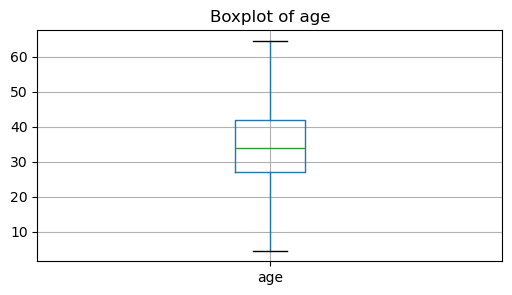

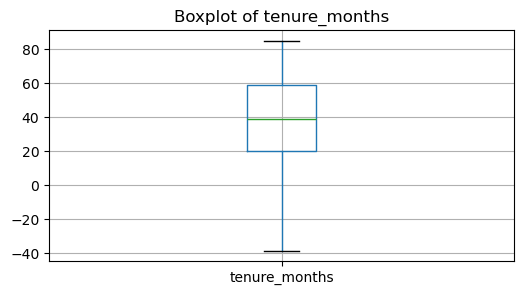

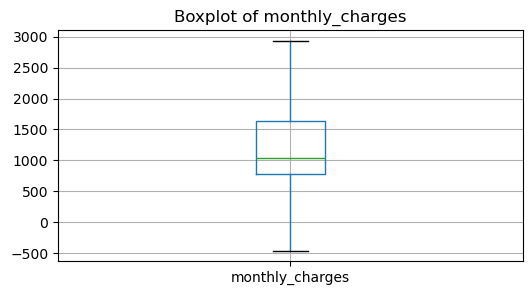

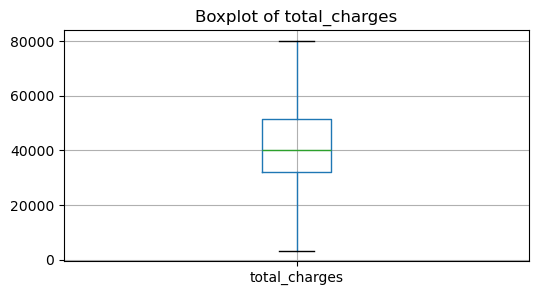

In [124]:
#Detecting outliers using the boxplot
import matplotlib.pyplot as plt

for col in ['age', 'tenure_months', 'monthly_charges', 'total_charges']:
    plt.figure(figsize=(6,3))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [69]:
# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print("Missing values after filling:\n", df.isnull().sum())

#Changing all to numeric
import numpy as np

# List of numeric columns
num_cols = ['age', 'tenure_months', 'monthly_charges', 'total_charges']

# Remove commas and convert to float
for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '')  # remove commas
    df[col] = pd.to_numeric(df[col], errors='coerce')   # convert to numeric, non-convertible → NaN

# Fill missing numeric values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Check
print(df[num_cols].head())
print("\nMissing values after fixing numeric columns:\n", df[num_cols].isnull().sum())





#saving a cleaned dataset
# Save the cleaned dataset before encoding
#df.to_csv("cleanedvalues3.csv", index=False)
#print("✅ Cleaned dataset saved successfully with no missing values")








Missing values per column:
 customer_id            0
age                    0
gender                 0
city                   0
county                 0
signup_date            0
last_purchase_date     0
tenure_months          0
monthly_charges        0
total_charges          0
plan_type              0
payment_method         0
contract               0
num_support_tickets    0
has_internet           0
data_usage_gb          0
is_senior_citizen      0
dependents             0
device_model           0
referrer               0
feedback_text          0
churn                  0
dtype: int64
Missing values after filling:
 customer_id            0
age                    0
gender                 0
city                   0
county                 0
signup_date            0
last_purchase_date     0
tenure_months          0
monthly_charges        0
total_charges          0
plan_type              0
payment_method         0
contract               0
num_support_tickets    0
has_internet           0
dat

In [85]:
# CATEGORICAL ENCODING 


In [58]:
# Convert boolean columns to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print("✅ Converted boolean columns to 0/1")


✅ Converted boolean columns to 0/1


In [60]:
import numpy as np
import pandas as pd

# List of numeric columns
num_cols = ['age', 'tenure_months', 'monthly_charges', 'total_charges']

# Remove commas if any and convert to numeric
for col in num_cols:
    df_encoded[col] = df_encoded[col].astype(str).str.replace(',', '')  # remove commas
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')   # convert to numeric

# Fill missing numeric values with median
df_encoded[num_cols] = df_encoded[num_cols].fillna(df_encoded[num_cols].median())

# Check missing values
print("Missing values after fixing numeric columns:\n", df_encoded[num_cols].isnull().sum())


Missing values after fixing numeric columns:
 age                0
tenure_months      0
monthly_charges    0
total_charges      0
dtype: int64


In [72]:
#df_encoded.to_csv("encoded_telecom12.csv", index=False)
#print("✅ Encoded dataset saved successfully with no missing values")


✅ Encoded dataset saved successfully with no missing values


In [83]:
#Recleaning the data

# Make a copy just in case
# Make a fresh copy of the cleaned dataset
df_cleaned3 = df.copy()

# --------- 1. Fix categorical inconsistencies ----------
df_cleaned3['gender'] = df_cleaned3['gender'].replace({'m':'male','f':'female','y':'yes','n':'no'})
df_cleaned3['has_internet'] = df_cleaned3['has_internet'].replace({True:'yes', False:'no','y':'yes','n':'no'})
df_cleaned3['dependents'] = df_cleaned3['dependents'].replace({True:'yes', False:'no','y':'yes','n':'no'})

df_cleaned3['contract'] = df_cleaned3['contract'].str.lower().replace({'2-yr':'two year','1-yr':'one year'})
df_cleaned3['payment_method'] = df_cleaned3['payment_method'].replace({'mpesa':'M-pesa'})
df_cleaned3['city'] = df_cleaned3['city'].replace({'Niarobi':'Nairobi','Nrb':'Nairobi'})

# Fill any remaining missing categorical values
cat_cols = ['gender','has_internet','dependents','contract','payment_method','city','plan_type']
df_cleaned3[cat_cols] = df_cleaned3[cat_cols].fillna('Unknown')

# --------- 2. Convert binary columns to 0/1 ----------
binary_cols = ['gender','has_internet','dependents']
df_cleaned3[binary_cols] = df_cleaned3[binary_cols].replace({'yes':1,'no':0})

# --------- 3. One-hot encode multi-class columns ----------
multi_cat_cols = ['city','plan_type','payment_method','contract']
df_encoded3 = pd.get_dummies(df_cleaned3, columns=multi_cat_cols, drop_first=True)

# --------- 4. Ensure numeric columns are clean ----------
num_cols = ['age','tenure_months','monthly_charges','total_charges']
for col in num_cols:
    df_encoded3[col] = df_encoded3[col].astype(str).str.replace(',', '')
    df_encoded3[col] = pd.to_numeric(df_encoded3[col], errors='coerce')
df_encoded3[num_cols] = df_encoded3[num_cols].fillna(df_encoded3[num_cols].median())

# --------- 5. Save the final encoded dataset ----------
df_encoded3.to_csv("encoded_telecom_final1.csv", index=False)
print("✅ Fully cleaned and encoded dataset saved as encoded_telecom_final.csv")


✅ Fully cleaned and encoded dataset saved as encoded_telecom_final.csv


In [77]:
# Identify boolean columns
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Convert True/False to 1/0
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Check
print("Converted boolean columns to integers:")
print(df_encoded[bool_cols].head())


Converted boolean columns to integers:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [79]:
# Save cleaned dataset
df_cleaned2.to_csv("cleaned_telecom_final.csv", index=False)
print("✅ Cleaned dataset saved successfully as cleaned_telecom_final.csv")


✅ Cleaned dataset saved successfully as cleaned_telecom_final.csv


In [87]:
# Save encoded dataset
df_encoded2.to_csv("encoded_telecom_final2.csv", index=False)
print("✅ Encoded dataset saved successfully as encoded_telecom_final.csv")


✅ Encoded dataset saved successfully as encoded_telecom_final.csv
